1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

C:\Users\User\AppData\Local\Temp/ipykernel_15384/258761678.py:6: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(datetime.now())


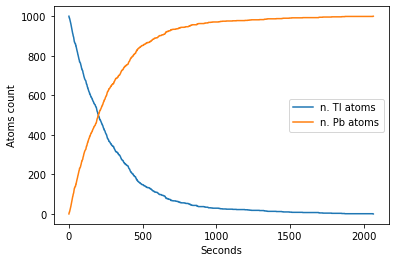

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random

random.seed(datetime.now())

tau = 3.052*60
nT = [1000]
nL = [0]
p = 1 - 2**(-1 / tau)

while nT[-1] > 0:
    r = np.random.random(nT[-1])
    decayed = np.sum(r < p)
    nT.append(nT[-1] - decayed)
    nL.append(nL[-1] + decayed)

fig = plt.figure()
plt.plot(nT, label='n. Tl atoms')
plt.plot(nL, label='n. Pb atoms')
plt.xlabel('Seconds')
plt.ylabel('Atoms count')
plt.legend()
plt.show()

No handles with labels found to put in legend.


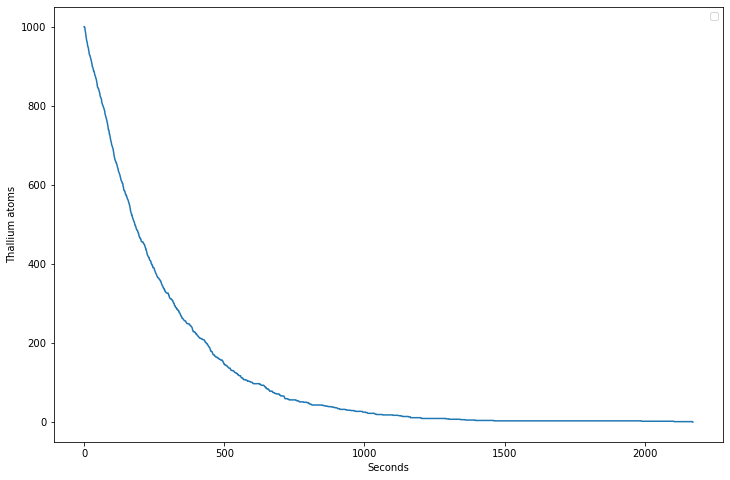

In [17]:
random.seed(235)
def icdf(y): # computed analytically
  return -tau * np.log2(1-y)

p = np.array([icdf(random.random()) for i in range(1000)])

nT = [1000]
seconds = 0
while nT[-1]  > 0:
  nT.append(1000 - np.sum(p < seconds))
  seconds += 1

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nT)
ax.set_xlabel('Seconds')
ax.set_ylabel('Thallium atoms')
ax.legend()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Mean: 1.34608
Error: 0.00094


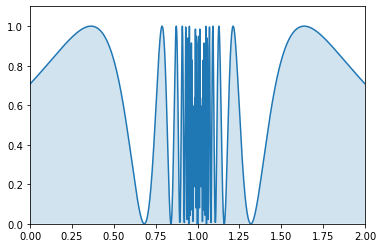

In [29]:
f = lambda x: np.sin(1 / (1-x))**2

x = np.linspace(0, 2, 1000)
plt.plot(x, f(x))
plt.fill_between(x, f(x), alpha = 0.2)
plt.xlim([0,2])
plt.ylim([0,1.1])

iter = 100
hit_miss = []
N=10000

for i in range(iter):    
    x = 2. * np.random.random(N)
    y = np.random.random(N)      #between min and max of f
    hit_miss.append(2.*np.sum(y < f(x))/N)
    
I = np.mean(hit_miss)
err = np.std(hit_miss)/np.sqrt(iter)
print("Mean: {:.5f}".format(I))
print("Error: {:.5f}".format(err))

In [30]:
N = 10000
I_mean_val = []

for i in range(iter):
    x = 2. * np.random.random(N)
    I_mean_val.append(np.mean(f(x))*2)
    

I = np.mean(I_mean_val)
err2 = np.std(I_mean_val)/np.sqrt(iter)
print("Mean: {:.5f}".format(I))
print("Error: {:.5f}".format(err2))

print("we decrease the error from: {:.5f}".format(err), " to: {:.5f}".format(err2))

Mean: 1.34626
Error: 0.00057
we decrease the error from: 0.00094  to: 0.00057


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [40]:
n_iter = 100
N = 10000
I_mv = []
for i in range(n_iter):    
    x = 2*np.random.random(N) - 1
    y = 2*np.random.random(N) - 1
    z = x**2 + y**2
    I_mv.append(4 * np.mean([z<=1]))
I = np.mean(I_mv)
err = np.std(I_mv)/np.sqrt(n_iter)
print("2D circle:")
print("Mean: {:.5f}".format(I))
print("Error: {:.5f}".format(err2))

2D circle:
Mean: 3.14028
Error: 0.00057


In [52]:
I_mv = []
dim=10
for i in range(iter):
    z=(2*np.random.random(N) - 1)**2
    for i in range(dim-1):
        z = z+(2*np.random.random(N) - 1)**2
    I_mv.append(2**dim * np.mean([z<=1]))

I = np.mean(I_mv)
err = np.std(I_mv)/np.sqrt(iter)
print("10D sphere")
print("Mean: {:.5f}".format(I))
print("Error: {:.5f}".format(err2))

10D sphere
Mean: 2.54976
Error: 0.00057


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

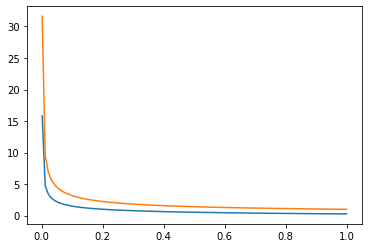

In [48]:
f = lambda x: x**-.5 / (1 + np.exp(x))
w = lambda x: x**-.5

x = np.linspace(0.001, 1, 100)
plt.plot(x, f(x))
plt.plot(x, w(x))

In [53]:
I_w = 2 # integral of the weight function in [0,1]
I = []

for i in range(iter):
    x = np.random.random(N)**2
    I.append(I_w * np.sum(f(x)/w(x)) / N)

print("Mean: {:.5f}".format(np.mean(I)))
print("Error: {:.5f}".format(np.std(I)/np.sqrt(iter)))

Mean: 0.83880
Error: 0.00014
